# Analysis of the Ca8452 line

In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')


In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
# import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import sys
sys.path.append('d:\solar flares\data\\2017-09-06')

import use_nessi3 as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaIR

In [6]:

reload(un)

<module 'use_nessi3' from 'd:\\solar flares\\data\\2017-09-06\\use_nessi3.py'>

In [7]:
# Specify the path to the folder you want to list files from
folder_path = "D:/solar flares/data/2017-09-10/"
file_n1="fits/16_23_51/crispex.stokes.8542.16_23_51.time_corrected.fcube"
file_n2="fits/16_31_11/crispex.stokes.8542.16_31_11.time_corrected.fcube"


number_of_frames = 169
def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= number_of_frames:
        raise IndexError(f'frame number {frame} is not in (0, {number_of_frames}).')
    elif frame <9:
        return folder_path + file_n1
    else:
        return folder_path + file_n2
    
ttff = timeframe_to_filename_fits


from ISPy.io import lapalma as lp
cube1 = lp.read(file_n1 , 21)
cube2 = lp.read(file_n2 , 21)

def alternative_datacube(timeframe):
    if timeframe >= number_of_frames or timeframe < 0:
        raise IndexError(f"Timeframe {timeframe} is negative or exeeds numer of frames {number_of_frames}.")
    elif timeframe <9:
        return cube1[timeframe, 0]
    else:
        return cube2[timeframe - 9, 0]

In [8]:
# # And now the running commands
# openfile="crispex.stokes.8542.16_23_51.time_corrected.fits"
# openfile="crispex.stokes.8542.16_31_11.time_corrected.fits"
# header= f.getheader(un.get_file_path_fits(openfile))
# header = un.add_enters(str(header), length_row=79)

# print(header)
# # np.savetxt('headerCaIR17a.txt', header)

# # with open('headers/headerCaIR17a.txt', 'w') as file:
# #     file.write(header)

In [9]:
openfile="crispex.stokes.8542.16_23_51.time_corrected.fits"
print(np.shape(alternative_datacube(0)))
openfile="crispex.stokes.8542.16_31_11.time_corrected.fits"
# with f.open(ttff(9), memmap=True) as hdul:
#     print(np.shape(hdul[1].data))
print("The above ommented code yields error: MemoryError: Unable to allocate 43.2 GiB for an array with shape (160, 4, 21, 925, 932) and data type float32")

(21, 925, 932)
The above ommented code yields error: MemoryError: Unable to allocate 43.2 GiB for an array with shape (160, 4, 21, 925, 932) and data type float32


In [10]:
# make good timeline
# 9 frames 16:23:51
# 160 frames from 16:31:11
# assuming constant rate that makes 10 shots on 00:07:40
min_per_frame = (7+40/60) / 10 
print(min_per_frame)
start_time = un.hulp_time("16:23:51")
time_list = [un.minutes_to_time_string(min_per_frame * t, start=start_time) for t in range(number_of_frames)]
time_list

0.7666666666666667


['16:23:00',
 '16:24:00',
 '16:25:00',
 '16:26:00',
 '16:26:00',
 '16:27:00',
 '16:28:00',
 '16:29:00',
 '16:29:00',
 '16:30:00',
 '16:31:00',
 '16:32:00',
 '16:33:00',
 '16:33:00',
 '16:34:00',
 '16:35:00',
 '16:36:00',
 '16:36:00',
 '16:37:00',
 '16:38:00',
 '16:39:00',
 '16:39:00',
 '16:40:00',
 '16:41:00',
 '16:42:00',
 '16:43:00',
 '16:43:00',
 '16:44:00',
 '16:45:00',
 '16:46:00',
 '16:46:00',
 '16:47:00',
 '16:48:00',
 '16:49:00',
 '16:49:00',
 '16:50:00',
 '16:51:00',
 '16:52:00',
 '16:52:00',
 '16:53:00',
 '16:54:00',
 '16:55:00',
 '16:56:00',
 '16:56:00',
 '16:57:00',
 '16:58:00',
 '16:59:00',
 '16:59:00',
 '17:00:00',
 '17:01:00',
 '17:02:00',
 '17:02:00',
 '17:03:00',
 '17:04:00',
 '17:05:00',
 '17:06:00',
 '17:06:00',
 '17:07:00',
 '17:08:00',
 '17:09:00',
 '17:09:00',
 '17:10:00',
 '17:11:00',
 '17:12:00',
 '17:12:00',
 '17:13:00',
 '17:14:00',
 '17:15:00',
 '17:15:00',
 '17:16:00',
 '17:17:00',
 '17:18:00',
 '17:19:00',
 '17:19:00',
 '17:20:00',
 '17:21:00',
 '17:22:00',

In [11]:
zeros = [np.array(alternative_datacube(0)[:, 920, 0])]
alternative_datacube(0).shape, zeros

((21, 925, 932),
 [array([ 2.56593  , 12.589665 , 24.392399 , 39.68849  , 57.413486 ,
         68.88453  , 73.149254 , 68.21451  , 59.00947  , 51.586994 ,
         46.878353 , 44.883545 , 45.658085 , 49.47648  , 54.184208 ,
         56.812077 , 51.936684 , 47.31586  , 38.180214 , 24.953495 ,
          4.8591075], dtype=float32)])

In [12]:
import use_nessi as un1
reload(un1)
un1.conv_time_wav('CaIR17a', do_time=False)

the wavelengts are [8540.34797851 8541.15297851 8541.36297851 8541.50297851 8541.64297851
 8541.74797851 8541.81797851 8541.88797851 8541.95797851 8542.02797851
 8542.09797851 8542.16797851 8542.23797851 8542.30797851 8542.37797851
 8542.44797851 8542.55297851 8542.69297851 8542.83297851 8543.04297851
 8543.84797851]


['line_data/wav_sstCaIR17a.npy']

D:/solar flares/data/2017-09-10/fits/16_23_51/crispex.stokes.8542.16_23_51.time_corrected.fcube
the shape of the data is (169, 4, 21, 925, 932)
the wavelengths are self._wavel = array([8540.34797851, 8541.15297851, 8541.36297851, 8541.50297851,
       8541.64297851, 8541.74797851, 8541.81797851, 8541.88797851,
       8541.95797851, 8542.02797851, 8542.09797851, 8542.16797851,
       8542.23797851, 8542.30797851, 8542.37797851, 8542.44797851,
       8542.55297851, 8542.69297851, 8542.83297851, 8543.04297851,
       8543.84797851])
(925, 932) (925, 932)
Boundary
Blue=Outside, yellow=Inside


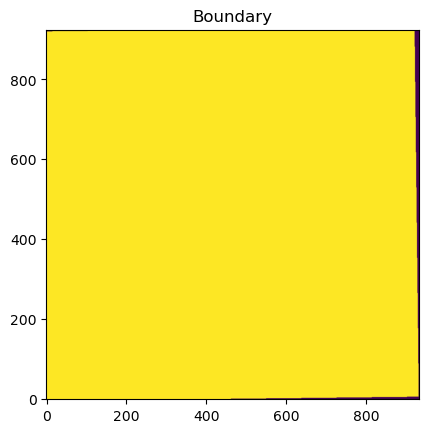

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstCaIR17a.npy', 
    number_of_frames=number_of_frames,
    time=time_list, 
    name_of_line='CaIR17a', 
    thresh=[0, np.percentile(alternative_datacube(0), 99.5)],  
    boundary_methode='search', 
    boundary_arguments = {"error":0.001, "zeros":zeros}, 
    alternative_datacube=alternative_datacube, 
    with_stokes=True,
    with_time=True,
    shape = (169, 4, 21, 925, 932), 
    cont_point=None
)
# (self, timeframe_to_filename_fits, spectfilename, number_of_frames, time, name_of_line,
#                  thresh=[1e-10,2e-7], boundary_methode='search', alternative_datacube=None,
#                  boundary_arguments=None, cont_point=None, with_stokes=False, with_time=False
# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaIR.boundary

In [14]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{CaIR.shape=}')

Not official start flare defined for CaIR17a falling back to first of TIME[0], the execpt_time 16:23:00.
the mean cadence is 46.07142857142857 for this line!
CaIR.shape=(169, 4, 21, 925, 932)


In [15]:
CaIR.calculate__FOV_spect_over_time()


In [16]:

s = np.sum(CaIR.boundary)
areafactor = s/847550 * 60**2 / (np.pi*950**2)

print(s, 'percentage of frame kept:', s/847550, 'areafactor:', areafactor) # to account for a bit of extra non excluded pixels


# CaIR.datacube[70,0,:,600,600]

853865.0 percentage of frame kept: 1.007450887853224 areafactor: 0.0012791730513173926


In [17]:
def gess_filters(n_wav):
    sd = n_wav/8
    return [[n_wav/6 - 0.5, sd], [3 * n_wav/6 - 0.5, sd], [5 * n_wav / 6 - 0.5, sd]]



[[5, 0.9], [8.0, 0.9], [11, 0.9]] 21


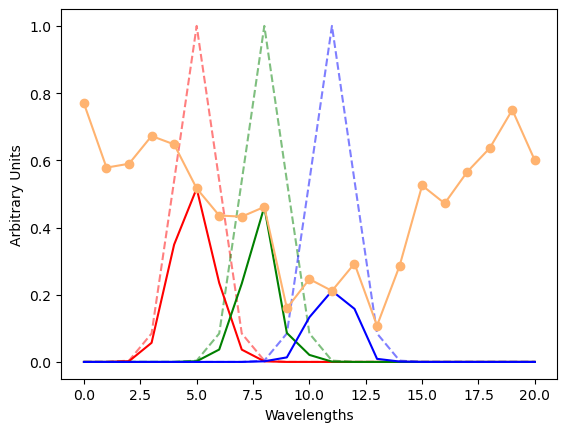

In [18]:
# %matplotlib inline
Meansd = gess_filters(len(CaIR._wavel))
Meansd = [[5, 0.9], [8.0, 0.9], [11, 0.9]]
print(Meansd,len(CaIR._wavel) )
CaIR.update_filters(Meansd)
CaIR.plot_filt(880,900)

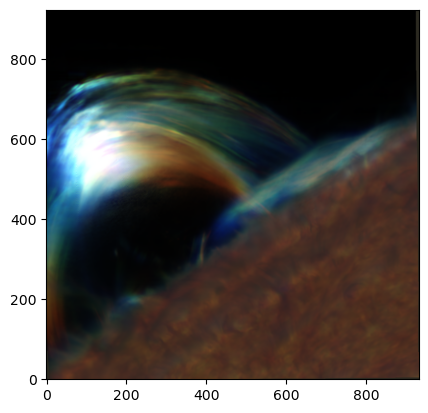

In [30]:

CaIR.ccp_frame(2,Show=False)
CaIR.thresh=[1e-7,2e-5]
plt.imshow(CaIR.current_ccp[:,:], origin='lower')
# plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
plt.show()

#interesting pixel: (1030, 975)

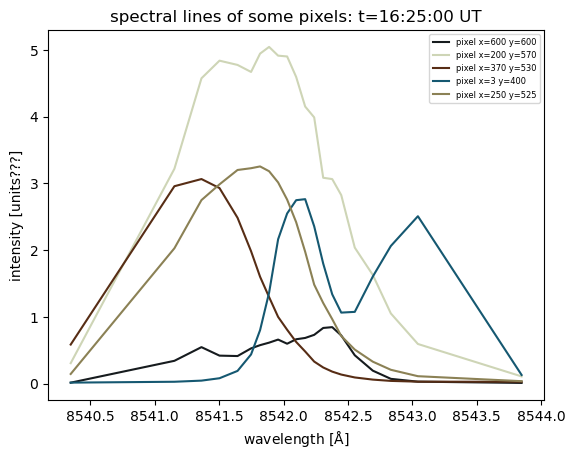

In [41]:
CaIR.interesting_pixels( frame=2, pixels=[(600, 600), (200,570), (370, 530), (3, 400), (250,525)], rand=False, numb=5)

In [18]:
# # Many COCOPLOTS
# r = CaIR._number_of_frames
# for i in range(0,r,40):
#     tstr = CaIR.time_of_frame(i)
#     print("COCOPLOT at ", tstr, "(frame number", i,")")
#     CaIR.ccp_frame(i,Show=False)
#     plt.imshow(CaIR.current_ccp[::-1,:])

#     plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
#     plt.show()


COCOPLOT at  t=16:25:00 UT (frame number 2 )


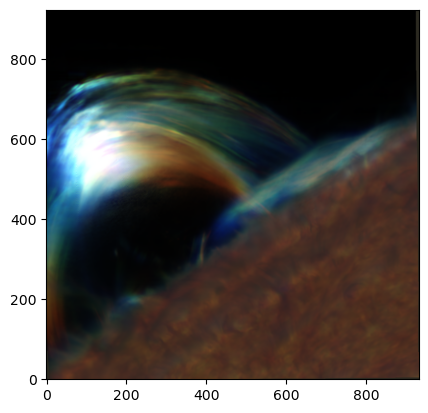

In [43]:
CaIR.ccp_frame(2)
pixels=[(600, 600), (200,570), (370, 530), (3, 400), (250,525)]
# CaIR.current_ccp[0:30:5,0:60:5,:]

2
wav [8540.34797851 8541.15297851 8541.36297851 8541.50297851 8541.64297851
 8541.74797851 8541.81797851 8541.88797851 8541.95797851 8542.02797851
 8542.09797851 8542.16797851 8542.23797851 8542.30797851 8542.37797851
 8542.44797851 8542.55297851 8542.69297851 8542.83297851 8543.04297851
 8543.84797851]
pixel (600, 600) intensity [ 0.885058   20.423372   32.640793   25.047989   24.68134    31.534998
 34.415565   36.654697   39.395695   35.696266   39.682495   40.853916
 43.630264   49.78782    50.5079     43.105347   25.38063    11.62158
  4.3000517   1.7868626   0.65717894]
pixel (200, 570) intensity [ 18.308771 192.08467  272.93735  288.70544  284.90063  278.61908
 295.0143   300.992    293.19037  292.46115  274.1658   247.69635
 238.01482  184.03738  182.85924  168.52373  121.61658   97.17375
  62.76662   35.466408   6.461528]
pixel (370, 530) intensity [ 34.955654  176.48036   182.89267   174.82469   148.28804   118.383736
  95.5513     77.3595     59.661625   48.182056   37.29450

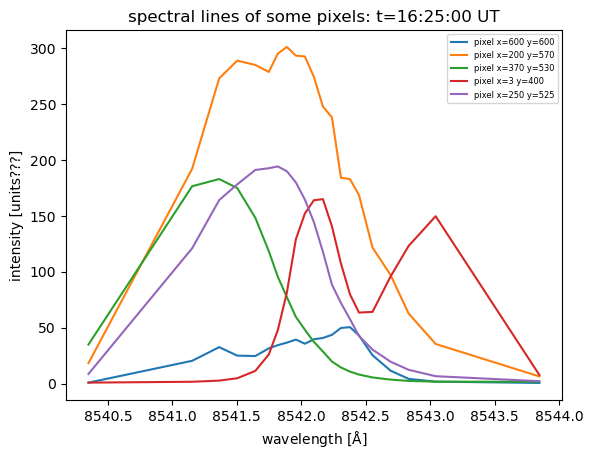

In [47]:


frame = 2

print(frame)
print("wav", CaIR._wavel)
colors = CaIR.ccp_frame(frame,Show=False)

fig, ax = plt.subplots(1)
ax.set_title("spectral lines of some pixels: "+ CaIR.time_of_frame(frame) )
for p in range(len(pixels)):
    ax.plot(CaIR._wavel, CaIR.datacube(frame)[ :, pixels[p][1], pixels[p][0]] ,
            label="pixel x="+str(pixels[p][0])+" y="+str(pixels[p][1]))
    print("pixel", pixels[p], "intensity",CaIR.datacube(frame)[ :, pixels[p][1], pixels[p][0]] )
ax.set_xlabel(r"wavelength [$\rm\AA$]")
ax.set_ylabel("intensity [units???]")
ax.legend(fontsize=6)
plt.show()

In [21]:
print('1',end='\rt')
print('10 ',end='')
print('\r\r\r11 ',end='')
j=12
s = ''
for i in range(len(str(j))+1):
    s += '\r'
print(s, end=str(j))

12  

In [22]:
CaIR.calculate__FOV_spect_over_time()

# try :
#     FOV_spectrum = np.load('FOV_spectrum_CaIR.npy')
# except:
#     # time_av_spectrum = np.array([CaIR.frame_integrated_spect(frame)/CaIR.scalar for frame in range(213)])
#     FOV_spectrum=[]
#     for frame in range(np.shape(CaIR.datacube)[0]):
#         s=''
#         for i in range(len(str(frame))+1):
#             s += '\r'
#         print(s, end=str(frame))
#         FOV_spectrum.append(CaIR.frame_integrated_spect(frame)/CaIR.scalar)

#     FOV_spectrum = np.array(FOV_spectrum)
#     np.save('FOV_spectrum_CaIR.npy', FOV_spectrum)
# np.shape(FOV_spectrum), CaIR.scalar

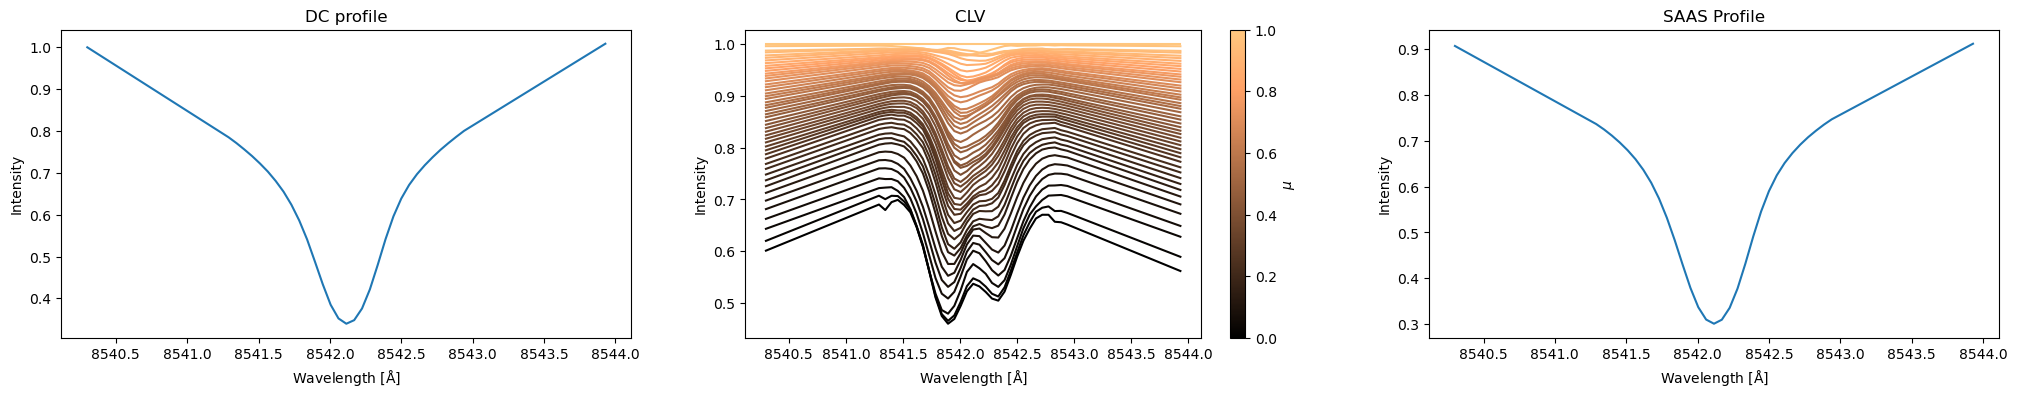

In [23]:
reload(un)
theor_CaIR = un.linestudier("E:/solar flares/data/2017-09-06/fits/8542_clv.fits", nr=101)


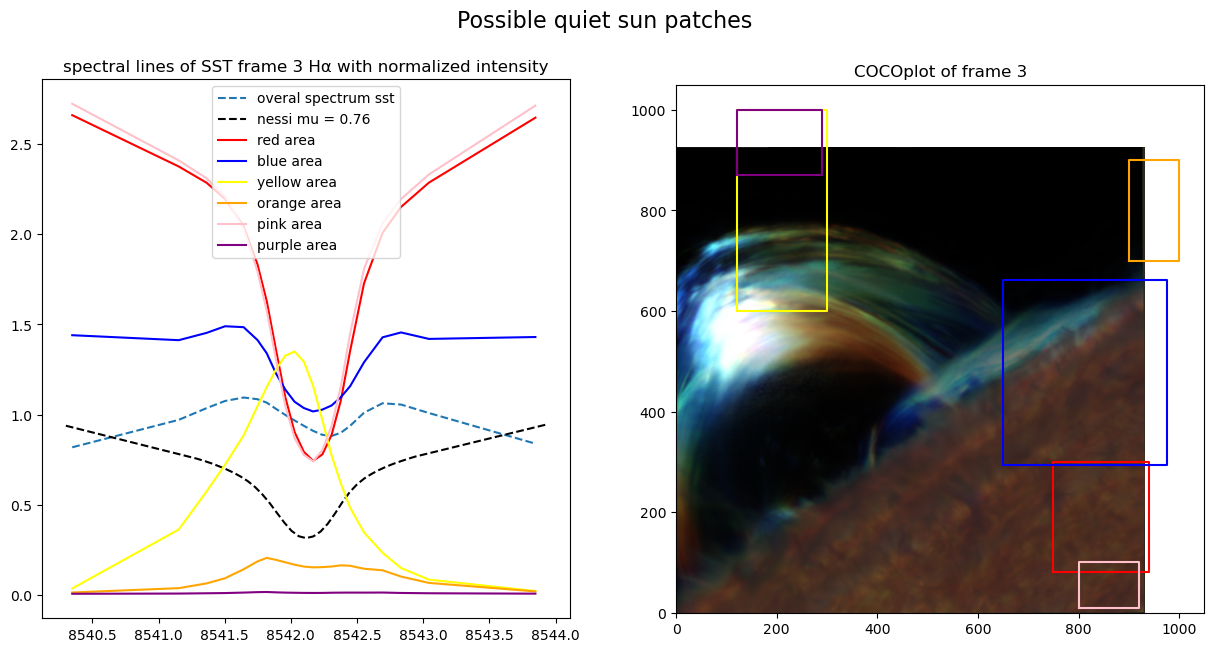

In [24]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(120,300), (600,1000)], [(900, 1000), (700, 900)], [(800,920), (10,100)] 
     , [(120,290), (870,1000)]]

CaIR.possible_quiet_sun_patches(frame, theor_line = theor_CaIR, X=X)

In [25]:
# the chosen quiet sun patch is 
color_wanted_patch = "pink"

# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (800, 920) and ylim: (10, 100)


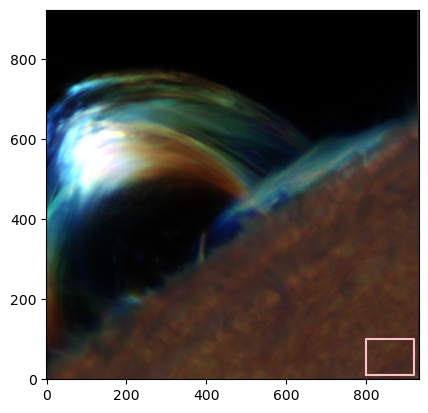

In [26]:
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
CaIR.set_quiet_sun(frame, xlim, ylim, show=False, color=color_wanted_patch)

## Finding $\mu$

In [27]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3884\466518928.py:29: RuntimeWarning: invalid value encountered in arcsin
  return np.cos(np.arcsin(rad_dist))


does MU contain nan's? True
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.1403111438142761 for timeframe 0
does MU contain nan's? True
[[926. 986.]
 [926. 986.]] [[113.7 113.7]
 [173.7 173.7]]
Coundourplot succesfully saved.


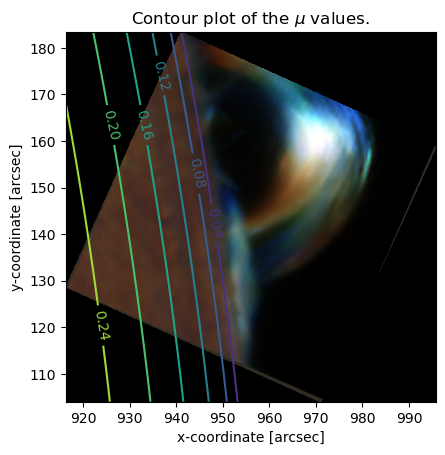

In [28]:
from matplotlib import transforms

# frame = 0
# extent = timeframe_to_extent(frame, ttff, invert=False, shift=(-1.2,0))
# xx, yy, MU = extent_to_grid(extent, Hbeta.shape, invert=False, angle=angle)
# xx0=xx
# yy0=yy


# mu = give_mu_contourplot(
#     MU,
#     xx,
#     yy,
#     extent,
#     over=Hbeta,
#     save=True,
#     save_name=Hbeta.name_of_line,
#     timeFrame=frame,
#     rotate=angle
# )
# sst_data = Hbeta
# theor_line = theor_Hbeta
# set_mu(Hbeta, mu)
# fix_mu_theor(mu, theor_line)
# # theor_line.sst_mu[theor_Hbeta.index_mu], theor_line.sst_clv[theor_Hbeta.index_mu][0], clv_fit(mu, theor_line)

angle = 1.46*np.pi/4 + np.pi 
frame = 0
width = 60
position = (956.0, 143.7) #[988.4344139920858, 926.6195139920857, -123.12272070844016, -164.54742070844014]

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [*fxp, position[1] - width / 2, position[1] + width / 2]
extent = fyp
xx, yy, MU = extent_to_grid(extent, CaIR.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=CaIR,
    save=True,
    save_name=CaIR.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


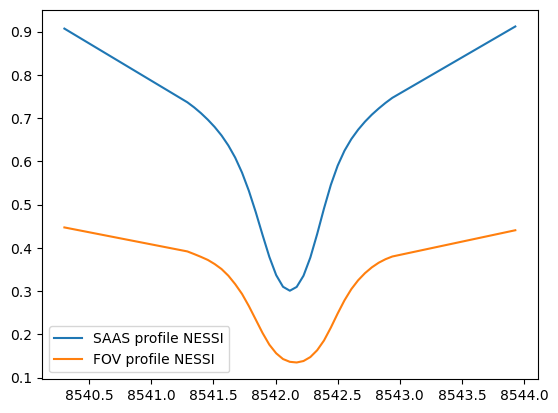

In [29]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63)

the edges of the patch are denoted by the xlim: (800, 920) and ylim: (10, 100)


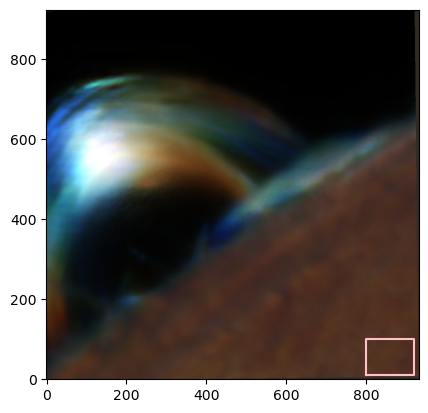

The quiet sun is pick at x (921.4341285773927, 131.4466984861069) with average              mu 0.24343092153537427
[[0.95909727 0.95906964 0.959042   ... 0.9558638  0.95583617 0.95580853]
 [0.95915894 0.95913131 0.95910367 ... 0.95592548 0.95589784 0.9558702 ]
 [0.95922062 0.95919298 0.95916534 ... 0.95598715 0.95595951 0.95593187]
 ...
 [0.96446271 0.96443508 0.96440744 ... 0.96122924 0.96120161 0.96117397]
 [0.96452438 0.96449675 0.96446911 ... 0.96129092 0.96126328 0.96123564]
 [0.96458606 0.96455842 0.96453078 ... 0.96135259 0.96132495 0.96129731]] [[0.14185745 0.14179625 0.14173504 ... 0.13469612 0.13463491 0.1345737 ]
 [0.14182961 0.1417684  0.14170719 ... 0.13466827 0.13460706 0.13454585]
 [0.14180176 0.14174056 0.14167935 ... 0.13464042 0.13457922 0.13451801]
 ...
 [0.13943487 0.13937366 0.13931245 ... 0.13227353 0.13221232 0.13215111]
 [0.13940702 0.13934581 0.1392846  ... 0.13224568 0.13218447 0.13212327]
 [0.13937917 0.13931797 0.13925676 ... 0.13221784 0.13215663 0.13209542

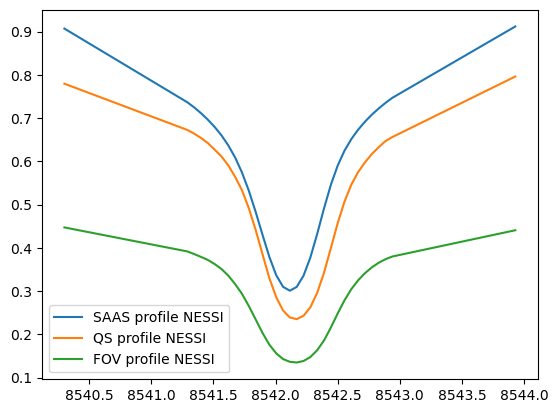

{'frame': 0, 'xlim': (800, 920), 'ylim': (10, 100), 'color': 'pink'}

In [30]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaIR.quiet_sun

[8540.34797851 8541.15297851 8541.36297851 8541.50297851 8541.64297851
 8541.74797851 8541.81797851 8541.88797851 8541.95797851 8542.02797851
 8542.09797851 8542.16797851 8542.23797851 8542.30797851 8542.37797851
 8542.44797851 8542.55297851 8542.69297851 8542.83297851 8543.04297851
 8543.84797851] [2.7630606  2.4529582  2.357519   2.26131361 2.08950057 1.88779144
 1.67974978 1.39945973 1.1168939  0.90352189 0.7909277  0.75548619
 0.79463915 0.92879522 1.12598506 1.41803015 1.80041341 2.08769786
 2.23824206 2.30899845 2.69432068] [0.77441699 0.68743316 0.66080637 0.62883327 0.5793024  0.51929383
 0.46115512 0.392177   0.32330734 0.27303575 0.24388672 0.23516497
 0.24755141 0.27950744 0.33221506 0.40241896 0.505209   0.58675234
 0.63342843 0.67080334 0.78468978]
[-0.01689944  3.39928214]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 522.322953162455
        x: [-5.526e-13  3.475e+00]
      nit: 8
      jac: [ 1.831e-04 

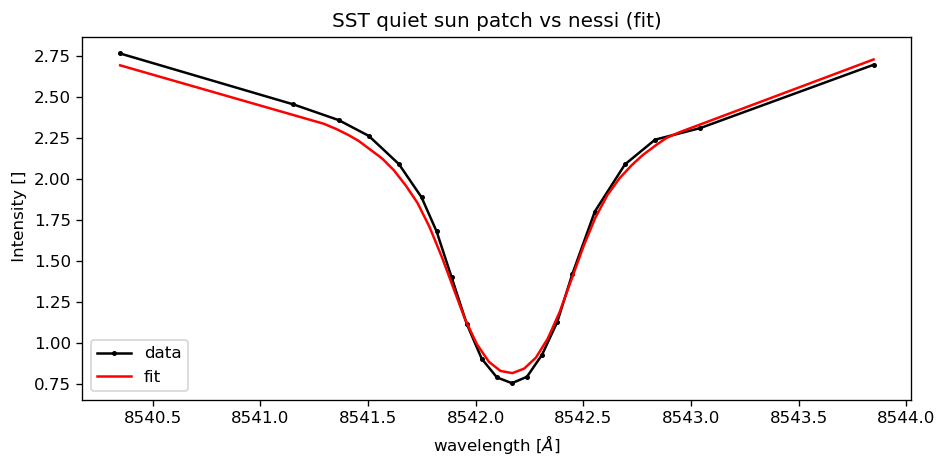

de p-waarde is  0.09373264553068723 
Chi^2 reduced= 27.490681745392365 
aantal vrijheidgraden= 19 
chi^2= 522.322953162455
we behouden de fit tot op een betrouwbaarheidsniveau van  0.09373264553068723 
Oftewel verwerp als p-waarde <lpha-niveau 


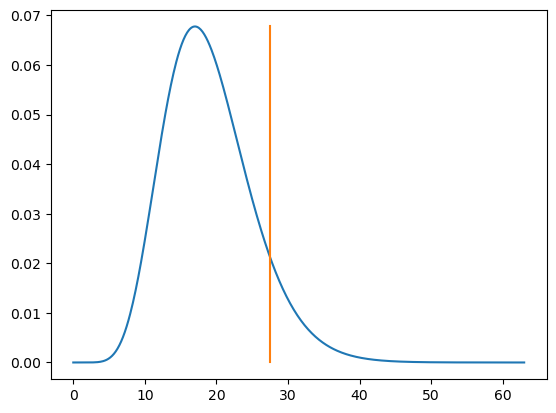

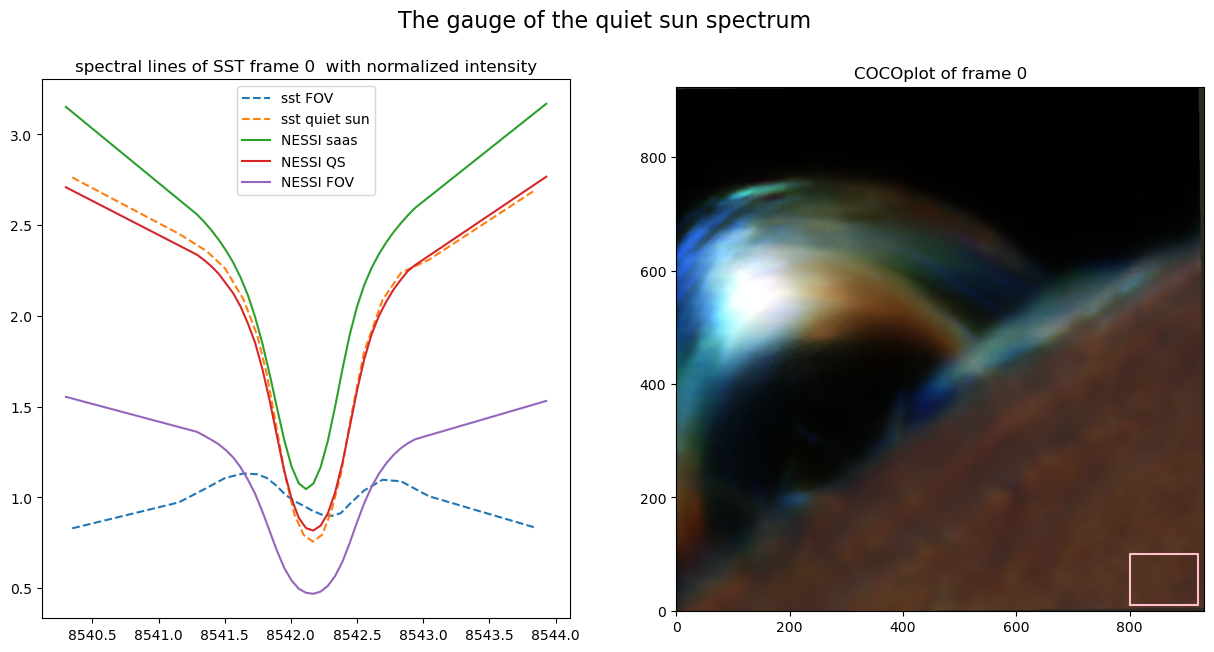

In [31]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

E:\solar flares/data/2017-09-06\use_nessi3.py:1732: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
E:\solar flares/data/2017-09-06\use_nessi3.py:1723: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
E:\solar flares/data/2017-09-06\use_nessi3.py:1720: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])
E:\solar flares/data/2017-09-06\use_nessi3.py:1720: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain fro

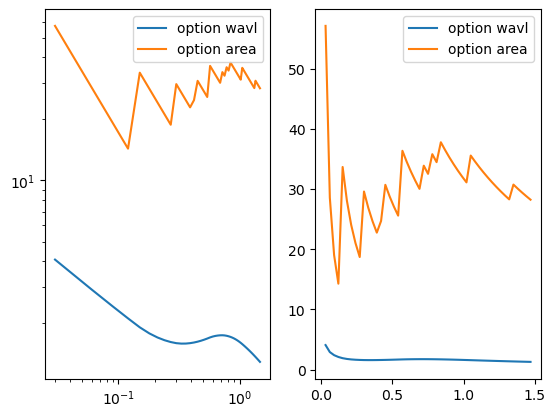

STD_Area = array([114.23520248,  57.11760124,  28.55880062,  19.03920041,
        14.27940031,  33.6686039 ,  28.05716991,  24.04900278,
        21.04287744,  18.70477994,  29.59018071,  26.90016429,
        24.65848393,  22.76167747,  24.7023151 ,  30.70606656,
        28.7869374 ,  27.09358814,  25.5883888 ,  36.36215277,
        34.54404513,  32.8990906 ,  31.40367739,  30.03830011,
        33.88538625,  32.5299708 ,  35.79739546,  34.471566  ,
        37.78085709,  36.47806891,  35.26213328,  34.12464511,
        33.05824995,  32.0564848 ,  31.11364701,  35.56714739,
        34.57917107,  33.64459888,  32.7592147 ,  31.91923484,
        31.12125397,  30.36219899,  29.63928949,  28.95000369,
        28.29204906,  30.74413723,  30.07578642,  29.43587608,
        28.82262866,  28.23441175]), STD_Wavl = array([0.        , 4.07927536, 2.91308647, 2.40187956, 2.10031424,
       1.89867161, 1.77230965, 1.69281081, 1.64133191, 1.60781279,
       1.58754681, 1.5796609 , 1.58058503, 1.587765

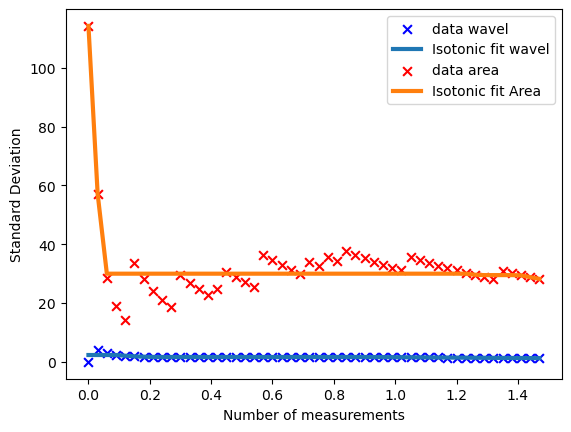

E:\solar flares/data/2017-09-06\use_nessi3.py:1797: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


Not official start flare defined for CaIR17a falling back to first of TIME[0], the execpt_time 16:23:00.
The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.15\AA$.
at an intesity of 3.4589018747248762e-06. For a standard deviation of 29.998653205723393.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.21\AA$.
at an intesity of 5.634523573670113e-05. For a standard deviation of 1.6928108108406068.



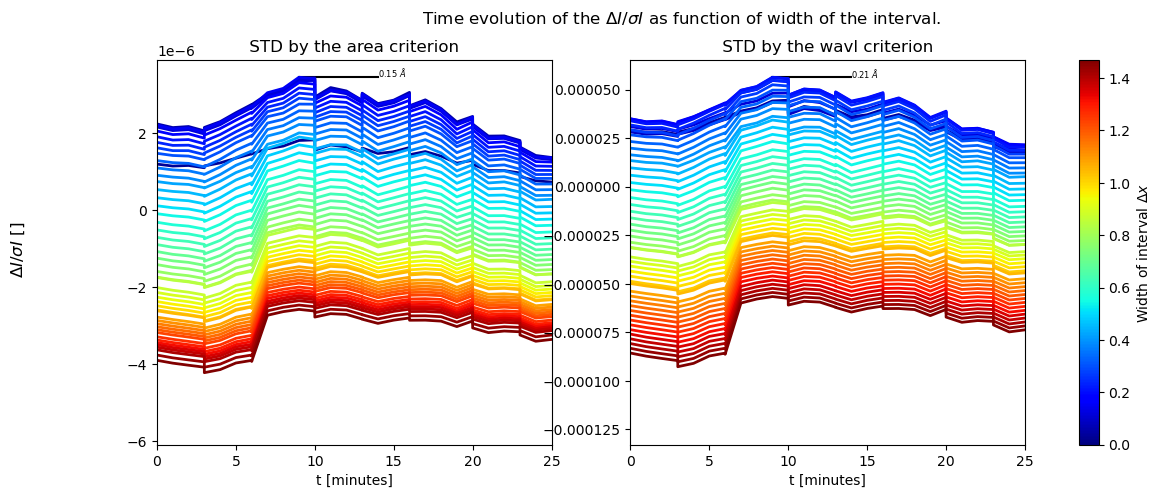

E:\solar flares/data/2017-09-06\use_nessi3.py:1967: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


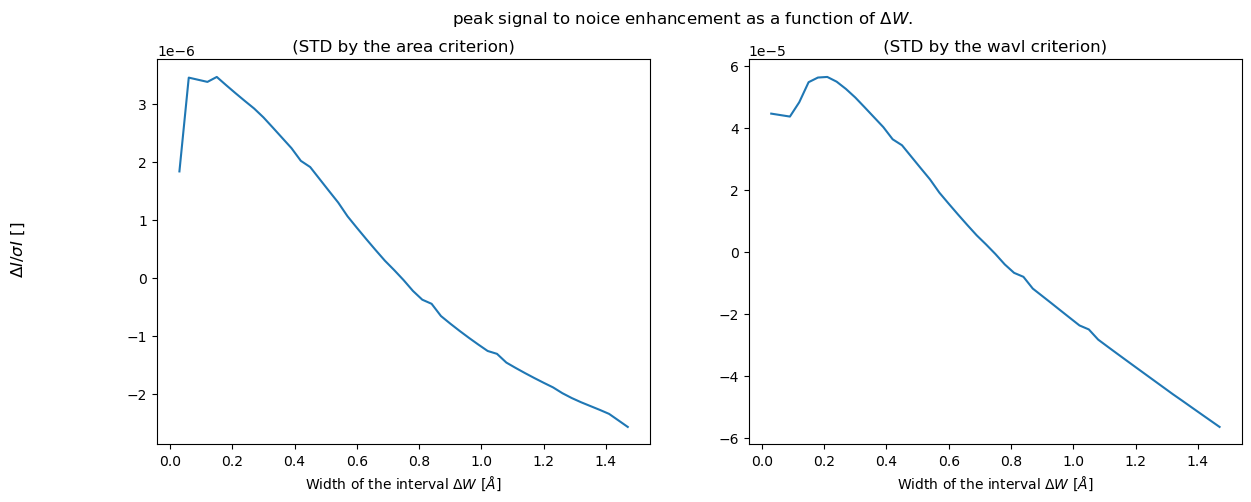

Directory 'line_data/optimal_width' already exists.


(array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 1.20037099e-06,  1.14987599e-06,  1.16539273e-06, ...,
         -2.45725954e-06, -2.40361453e-06, -2.36103160e-06],
        [ 2.24493491e-06,  2.14995144e-06,  2.17765696e-06, ...,
         -4.68107456e-06, -4.58042719e-06, -4.49969542e-06],
        ...,
        [-3.62601716e-06, -3.69788659e-06, -3.75071896e-06, ...,
         -5.38860320e-06, -5.40072874e-06, -5.31429742e-06],
        [-3.76223506e-06, -3.83491186e-06, -3.88841424e-06, ...,
         -5.50695229e-06, -5.51926275e-06, -5.43021131e-06],
        [-3.89910136e-06, -3.97245978e-06, -4.02657954e-06, ...,
         -5.62538728e-06, -5.63786475e-06, -5.54622032e-06]]),
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 2.91933360e-05,  2.79652844e-05,  2.83426557e-05, ...,
         -5.97611939e-05, -5.84565333e

In [32]:
Deltas=np.arange(0,1.5, 0.03)
un.analyse_optimal_interval(CaIR, Deltas)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [11] at time ['t=16:32:00 UT'].
The SST data runs from t=16:23:00 UT to t=18:32:00 UT.
The areafactor for THIS flare is -0.0004660560745221969 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: -37.45%.


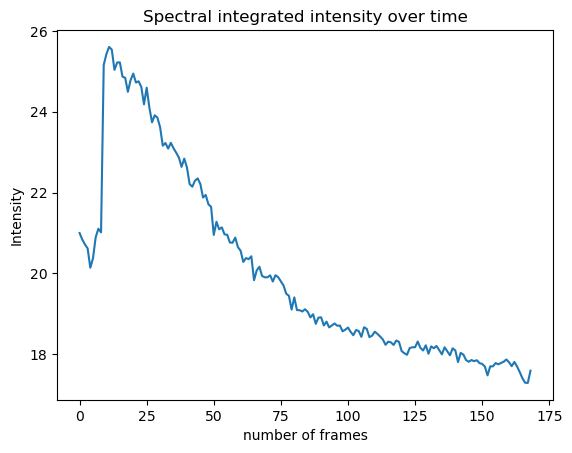

In [33]:
un.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

[-5.525787500658096e-13, 0, 3.4748785602853083]
Frame: 0, 16:23:00, total number of frames: 169 


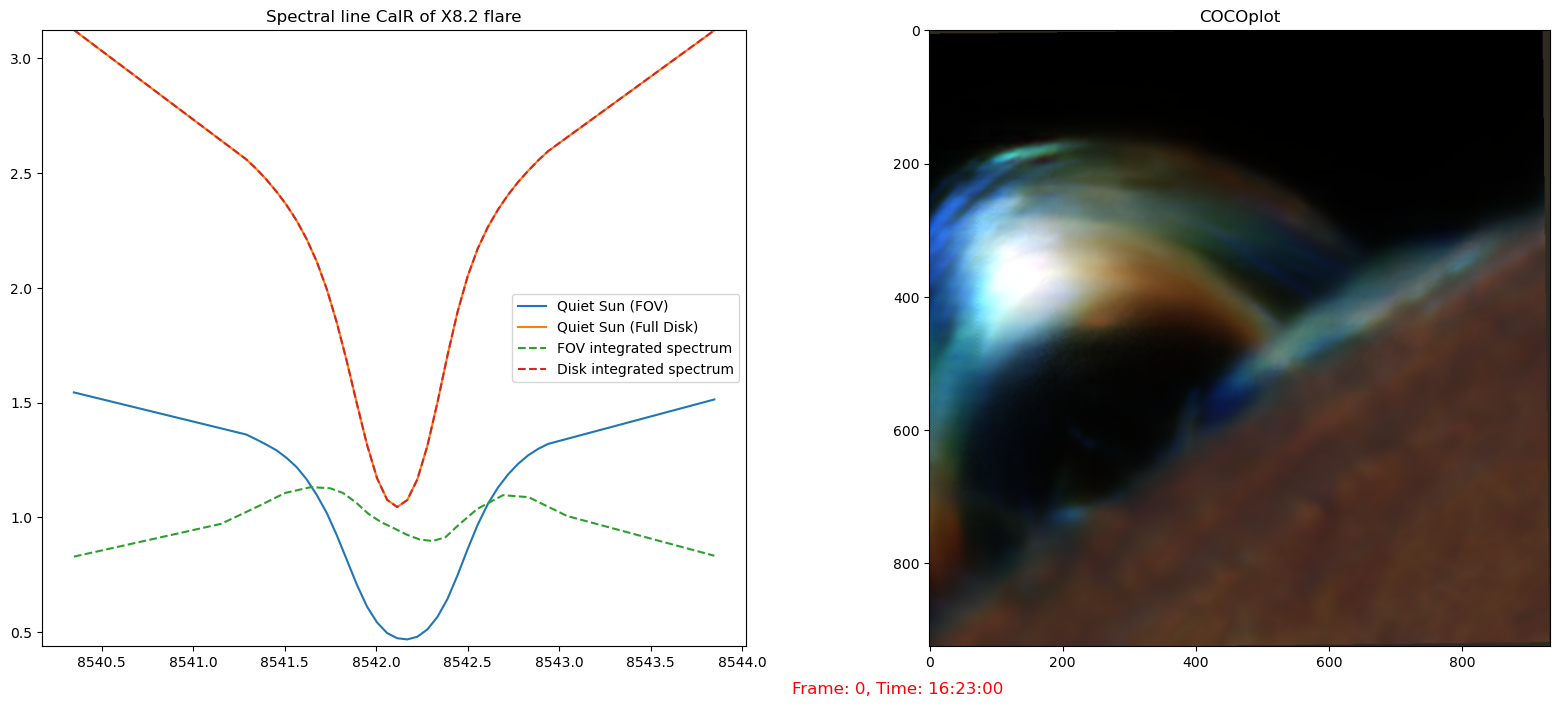

In [34]:
# fill in here all arguments
theor_line = theor_CaIR
sst_data = CaIR
name_of_flare = "X8.2"
name_of_line = "CaIR"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)

In [ ]:
exit()

: 